# Week 12 Problem 4

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

## Author: Radhir Kothuri
### Primary Reviewer: Apurv Garg

# Due Date: 6 PM, April 16, 2018

In [1]:
% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import Counter
# testing tools
from nose.tools import (
    assert_equal, assert_true, raises
)

# These two lines suppress warnings that sometimes
# occur when making visualizations
import warnings
warnings.filterwarnings('ignore')

# Map data
In the following code cell, an array of objects has been created with the variable `map_data` which represents airport routes and their respective distances for an airlines. Each object in the array consists of 2 keys: `ports` and `distance`. The `ports` value represents an array of size 2 where the first element represents the source airport and the second element represents the destination airport. The `distance` value represents the respective distance flown for that particular flight. For example for the first object in the `map_data` array, the object represents a flight from `SCL` to `LIM` where the distance is 2453.

In [3]:
map_data = [  
   {  
      'ports':[  
         'SCL',
         'LIM'
      ],
      'distance':2453
   },
   {  
      'ports':[  
         'LIM',
         'MEX'
      ],
      'distance':4231
   },
   {  
      'ports':[  
         'LIM',
         'BOG'
      ],
      'distance':1879
   },
   {  
      'ports':[  
         'MEX',
         'LAX'
      ],
      'distance':2499
   },
   {  
      'ports':[  
         'MEX',
         'CHI'
      ],
      'distance':2714
   },
   {  
      'ports':[  
         'MEX',
         'MIA'
      ],
      'distance':2053
   },
   {  
      'ports':[  
         'MEX',
         'BOG'
      ],
      'distance':3158
   },
   {  
      'ports':[  
         'BOG',
         'MIA'
      ],
      'distance':2425
   },
   {  
      'ports':[  
         'BOG',
         'SAO'
      ],
      'distance':4323
   },
   {  
      'ports':[  
         'BOG',
         'BUE'
      ],
      'distance':4651
   },
   {  
      'ports':[  
         'BUE',
         'SAO'
      ],
      'distance':1680
   },
   {  
      'ports':[  
         'SAO',
         'MAD'
      ],
      'distance':8373
   },
   {  
      'ports':[  
         'SAO',
         'LOS'
      ],
      'distance':6367
   },
   {  
      'ports':[  
         'LOS',
         'KRT'
      ],
      'distance':3341
   },
   {  
      'ports':[  
         'LOS',
         'FIH'
      ],
      'distance':1812
   },
   {  
      'ports':[  
         'FIH',
         'KRT'
      ],
      'distance':2904
   },
   {  
      'ports':[  
         'FIH',
         'JNB'
      ],
      'distance':2767
   },
   {  
      'ports':[  
         'JNB',
         'KRT'
      ],
      'distance':4640
   },
   {  
      'ports':[  
         'KRT',
         'CAI'
      ],
      'distance':1614
   },
   {  
      'ports':[  
         'CAI',
         'ALG'
      ],
      'distance':2710
   },
   {  
      'ports':[  
         'CAI',
         'IST'
      ],
      'distance':1227
   },
   {  
      'ports':[  
         'CAI',
         'BGW'
      ],
      'distance':1264
   },
   {  
      'ports':[  
         'CAI',
         'RUH'
      ],
      'distance':1614
   },
   {  
      'ports':[  
         'ALG',
         'MAD'
      ],
      'distance':726
   },
   {  
      'ports':[  
         'ALG',
         'PAR'
      ],
      'distance':1354
   },
   {  
      'ports':[  
         'ALG',
         'IST'
      ],
      'distance':1354
   },
   {  
      'ports':[  
         'MAD',
         'NYC'
      ],
      'distance':5786
   },
   {  
      'ports':[  
         'MAD',
         'LON'
      ],
      'distance':5786
   },
   {  
      'ports':[  
         'MAD',
         'PAR'
      ],
      'distance':1041
   },
   {  
      'ports':[  
         'LON',
         'NYC'
      ],
      'distance':5579
   },
   {  
      'ports':[  
         'LON',
         'ESS'
      ],
      'distance':494
   },
   {  
      'ports':[  
         'LON',
         'PAR'
      ],
      'distance':343
   },
   {  
      'ports':[  
         'PAR',
         'ESS'
      ],
      'distance':433
   },
   {  
      'ports':[  
         'PAR',
         'MIL'
      ],
      'distance':643
   },
   {  
      'ports':[  
         'MIL',
         'ESS'
      ],
      'distance':681
   },
   {  
      'ports':[  
         'MIL',
         'IST'
      ],
      'distance':1665
   },
   {  
      'ports':[  
         'ESS',
         'LED'
      ],
      'distance':1728
   },
   {  
      'ports':[  
         'LED',
         'MOW'
      ],
      'distance':626
   },
   {  
      'ports':[  
         'LED',
         'IST'
      ],
      'distance':2096
   },
   {  
      'ports':[  
         'MOW',
         'THR'
      ],
      'distance':2462
   },
   {  
      'ports':[  
         'MOW',
         'IST'
      ],
      'distance':1763
   },
   {  
      'ports':[  
         'IST',
         'BGW'
      ],
      'distance':1612
   },
   {  
      'ports':[  
         'BGW',
         'THR'
      ],
      'distance':704
   },
   {  
      'ports':[  
         'BGW',
         'KHI'
      ],
      'distance':2410
   },
   {  
      'ports':[  
         'BGW',
         'RUH'
      ],
      'distance':951
   },
   {  
      'ports':[  
         'THR',
         'DEL'
      ],
      'distance':2550
   },
   {  
      'ports':[  
         'THR',
         'KHI'
      ],
      'distance':1933
   },
   {  
      'ports':[  
         'THR',
         'RUH'
      ],
      'distance':1269
   },
   {  
      'ports':[  
         'RUH',
         'KHI'
      ],
      'distance':2065
   },
   {  
      'ports':[  
         'KHI',
         'DEL'
      ],
      'distance':1069
   },
   {  
      'ports':[  
         'KHI',
         'BOM'
      ],
      'distance':873
   },
   {  
      'ports':[  
         'DEL',
         'CCU'
      ],
      'distance':1313
   },
   {  
      'ports':[  
         'DEL',
         'MAA'
      ],
      'distance':1753
   },
   {  
      'ports':[  
         'DEL',
         'BOM'
      ],
      'distance':1135
   },
   {  
      'ports':[  
         'BOM',
         'MAA'
      ],
      'distance':1033
   },
   {  
      'ports':[  
         'MAA',
         'CCU'
      ],
      'distance':1382
   },
   {  
      'ports':[  
         'MAA',
         'BKK'
      ],
      'distance':2229
   },
   {  
      'ports':[  
         'MAA',
         'JKT'
      ],
      'distance':3627
   },
   {  
      'ports':[  
         'CCU',
         'HKG'
      ],
      'distance':2618
   },
   {  
      'ports':[  
         'CCU',
         'BKK'
      ],
      'distance':1636
   },
   {  
      'ports':[  
         'BKK',
         'HKG'
      ],
      'distance':1688
   },
   {  
      'ports':[  
         'BKK',
         'SGN'
      ],
      'distance':716
   },
   {  
      'ports':[  
         'BKK',
         'JKT'
      ],
      'distance':2295
   },
   {  
      'ports':[  
         'HKG',
         'SHA'
      ],
      'distance':1230
   },
   {  
      'ports':[  
         'HKG',
         'TPE'
      ],
      'distance':807
   },
   {  
      'ports':[  
         'HKG',
         'MNL'
      ],
      'distance':1144
   },
   {  
      'ports':[  
         'HKG',
         'SGN'
      ],
      'distance':1488
   },
   {  
      'ports':[  
         'SHA',
         'PEK'
      ],
      'distance':1075
   },
   {  
      'ports':[  
         'SHA',
         'ICN'
      ],
      'distance':840
   },
   {  
      'ports':[  
         'SHA',
         'TYO'
      ],
      'distance':1782
   },
   {  
      'ports':[  
         'SHA',
         'TPE'
      ],
      'distance':678
   },
   {  
      'ports':[  
         'PEK',
         'ICN'
      ],
      'distance':904
   },
   {  
      'ports':[  
         'ICN',
         'TYO'
      ],
      'distance':1207
   },
   {  
      'ports':[  
         'TYO',
         'SFO'
      ],
      'distance':8296
   },
   {  
      'ports':[  
         'TYO',
         'OSA'
      ],
      'distance':407
   },
   {  
      'ports':[  
         'OSA',
         'TPE'
      ],
      'distance':1740
   },
   {  
      'ports':[  
         'TPE',
         'MNL'
      ],
      'distance':1170
   },
   {  
      'ports':[  
         'MNL',
         'SFO'
      ],
      'distance':11244
   },
   {  
      'ports':[  
         'MNL',
         'SYD'
      ],
      'distance':6243
   },
   {  
      'ports':[  
         'MNL',
         'SGN'
      ],
      'distance':1613
   },
   {  
      'ports':[  
         'SGN',
         'JKT'
      ],
      'distance':1878
   },
   {  
      'ports':[  
         'JKT',
         'SYD'
      ],
      'distance':5502
   },
   {  
      'ports':[  
         'SYD',
         'LAX'
      ],
      'distance':12051
   },
   {  
      'ports':[  
         'LAX',
         'SFO'
      ],
      'distance':543
   },
   {  
      'ports':[  
         'LAX',
         'CHI'
      ],
      'distance':2828
   },
   {  
      'ports':[  
         'SFO',
         'CHI'
      ],
      'distance':2994
   },
   {  
      'ports':[  
         'CHI',
         'YYZ'
      ],
      'distance':684
   },
   {  
      'ports':[  
         'CHI',
         'ATL'
      ],
      'distance':958
   },
   {  
      'ports':[  
         'ATL',
         'WAS'
      ],
      'distance':883
   },
   {  
      'ports':[  
         'ATL',
         'MIA'
      ],
      'distance':957
   },
   {  
      'ports':[  
         'MIA',
         'WAS'
      ],
      'distance':1483
   },
   {  
      'ports':[  
         'WAS',
         'YYZ'
      ],
      'distance':575
   },
   {  
      'ports':[  
         'WAS',
         'NYC'
      ],
      'distance':334
   },
   {  
      'ports':[  
         'NYC',
         'YYZ'
      ],
      'distance':568
   }
]

In [24]:
map_data[1]['ports']

['LIM', 'MEX']

## Question 1

Given the `map_data` variable above, construct a direct graph using the networkX library that represents a graphical representation of all the routes in the `map_data` variable. Complete the function `draw_routes` below.

- Construct a Directed Graph with the `map_data` function parameter
- Each node in the graph should be an airport in the map data
- Each edge between two nodes represents a route. Since the graph is directed, each edge should represent a flight from the source to the destination. For example for the first object in the graph, there should be a directed edge from SCL to LIM.
- Each edge in the directed graph should have a `weight` attribute when added to the graph. The `weight` attribute value should be the value of the `distance` key in the `map_data` variable for a specific route. **Please make sure to set the `weight` attribute on each edge when adding to graph. You will automatically fail all the tests if you do not do this.**
- For example for the route `SCL` to `LIM`, the distance is 2453. This value should be added to the edge between SCL and LIM under the `weight` attribute. Reference: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.MultiDiGraph.add_edge.html. Look at the `add_edge` documentation on how to add any keyword attribute for a specific edge.
- Return the constructed directed graph

Your graph should look something like this after constructing it:
![Graph of Map Routes](images/map-graph.png)

In [20]:
def draw_routes(map_data):
    """
    Construct a directed graph of routes using the map_data function parameter
    
    Parameters
    ----------
    map_data: an array of objects that represents the routes in the map
    
    Returns
    -------
    A nx.Digraph object
    """
    
    # YOUR CODE HERE
    # Create directed graph and add first node
    dg = nx.DiGraph()
    for i in range(len(map_data)):
        dg.add_node(map_data[i]['ports'][0])
        dg.add_edge(map_data[i]['ports'][0],map_data[i]['ports'][1],
                    weight=map_data[i]['distance'])
        
    return dg

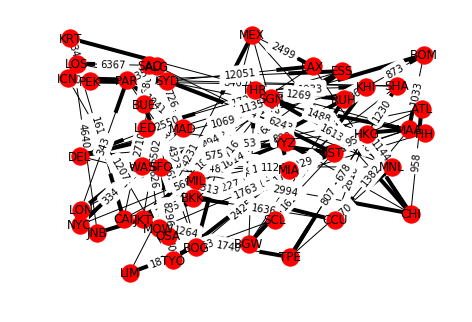

In [21]:
dg = draw_routes(map_data)
layout = nx.random_layout(dg)
nx.draw(dg, layout, with_labels=True)
edge_labels = nx.get_edge_attributes(dg, 'weight')
assert_true(edge_labels is not None, msg='Make sure you have set the weight attribute of each edge when added to graph.')
nx.draw_networkx_edge_labels(dg, layout, edge_labels=edge_labels)

# Tests
assert_true(type(dg) is nx.DiGraph)
cities = []
routes = []
weights = []
for route in map_data:
    src, dst = route['ports'][0], route['ports'][1]
    if src not in cities:
        cities.append(src)
    if dst not in cities:
        cities.append(dst)
    routes.append((src, dst))
    weights.append(route['distance'])
for node in dg.nodes():
    assert_true(node in cities)
for edge in dg.edges():
    assert_true(edge in routes)
for weight in edge_labels.values():
    assert_true(weight in weights)

## Question 2

In this question we will determine the shortest length route between any 2 airports in our `map_data` as well as the total distance.

One of the famous algorithms in computer science is (Dijkstra's algorithm)[https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm] which computes the shortest path between any 2 nodes in a weighted graph. This algorithm will be useful in our constructed graph from above for identifying the shortest path between any 2 airports in the graph as long as there is a path that exists between them. We will be optimizing the total distance in our function `get_shortest_path` which will return a 2-tuple of the flight route as well a list of airports to visit from the source to the destination as well as the total distance traveled.

While implementing Dijkstra's algorithm is beyond the scope of this course, we will be using the inbuilt `nx.dijkstra_path` and `nx.dijkstra_path_length` NetworkX functions in order to find the shortest path and the smallest total distance between the `src` and `dst` function parameters.

For example, to go from `SCL` to `MEX`, you will need to go through `LIM`. Since this is the only possible route, `SCL`->`LIM`->`MEX`, it is also the shortest path.

Reference: `nx.dijkstra_path`: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html

Reference: `nx.dijkstra_path_length`: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path_length.html

- Complete the function `get_shortest_path` that takes in 2 parameters: `src` and `dst` which are airport codes in `map_data` from above.
- Call `draw_routes` function from above to retrieve the directed graph that we constructed above.
- Use this graph to call `nx.dijkstra_path` and `nx.dijkstra_path_length` in order to retreive the total distance between the `src` and `dst` airports as well as the flight route respectively. 
- Make sure to pass in the `weight` attribute as the parameter that you want to optimize for in the dijkstra's algorithm.
- Return the result of `nx.dijkstra_path_length` and `nx.dijkstra_path` respectively from the function

In [31]:
def get_shortest_path(src, dst):
    '''    
    Return a 2-tuple of the flight route and distance between the source and destination
    
    Parameters
    ----------
    src: a string representing the source airport
    dst: a string representing the destination airport
    
    Returns
    -------
    A 2-tuple of a list of strings and integer respectively
    '''
    
    # YOUR CODE HERE
    dg = draw_routes(map_data)
    dplength = nx.dijkstra_path_length(dg,src,dst)
    #(str(src),str(dst)
    dp = nx.dijkstra_path(dg,src,dst)
    #weight=nx.get_edge_attributes(dg, 'weight')[(src,dst)]
    return dp, dplength

In [32]:
path, distance = get_shortest_path('SCL', 'MEX') 
assert_true(path == ['SCL', 'LIM', 'MEX'])
assert_true(distance == 6684)

path, distance = get_shortest_path('SCL', 'KRT') 
assert_true(path == ['SCL', 'LIM', 'BOG', 'SAO', 'LOS', 'KRT'])
assert_true(distance == 18363)

@raises(nx.NetworkXNoPath)
def test_no_path_exists():
    get_shortest_path('TPE', 'SCL')
test_no_path_exists()

## Question 3

In this question, we will return the top `k` airports that have the most departing flights.

- Complete the function `get_k_most_departing_airports` that takes in 2 function parameters `k` and `map_data` and returns the `k` most airports that have the most departing flights. 
- Return a list of strings where each string is an airport code and the size of the list is k.
- The list should be ordered from highest to lowest in terms of number of departing flights.

In [61]:
def get_k_most_departing_airports(k, map_data):
    '''    
    Return a list of k airport codes that have the most number of departing flights
    sorted from highest to lowest
    
    Parameters
    ----------
    k: an integer
    map_data: an array of objects that represents the routes in the map
    
    Returns
    -------
    A list of strings
    '''
    
    # YOUR CODE HERE
    dg = draw_routes(map_data)
    dg.nodes
    dic = {}
    for element in dg.nodes():
        dic[element] = 0
        for i in range(len(map_data)):
            if map_data[i]['ports'][0]==element:
                dic[element]+=1
    final = sorted(dic.items(), key=lambda x:x[1],reverse=True)[0:k]
    finalfinal = [i[0] for i in final]
    return finalfinal

In [62]:
cities = get_k_most_departing_airports(5, map_data)
assert_true(len(cities) == 5)
assert_true('SHA' in cities)
assert_true('MEX' in cities)
assert_true('HKG' in cities)
assert_true('CAI' in cities)

cities = get_k_most_departing_airports(10, map_data)
assert_true(len(cities) == 10)
assert_true('SHA' in cities)
assert_true('MEX' in cities)
assert_true('HKG' in cities)